In [2]:
import gseapy as gp
import pickle

In [4]:
for name in gp.get_library_name(organism='Human'):
    if 'reac' in name.lower():
        print(name)

Reactome_2013
Reactome_2015
Reactome_2016
Reactome_2022


In [3]:
for name in gp.get_library_name(organism='Human'):
    if 'go' in name.lower():
        print(name)

GO_Biological_Process_2013
GO_Biological_Process_2015
GO_Biological_Process_2017
GO_Biological_Process_2017b
GO_Biological_Process_2018
GO_Biological_Process_2021
GO_Biological_Process_2023
GO_Cellular_Component_2013
GO_Cellular_Component_2015
GO_Cellular_Component_2017
GO_Cellular_Component_2017b
GO_Cellular_Component_2018
GO_Cellular_Component_2021
GO_Cellular_Component_2023
GO_Molecular_Function_2013
GO_Molecular_Function_2015
GO_Molecular_Function_2017
GO_Molecular_Function_2017b
GO_Molecular_Function_2018
GO_Molecular_Function_2021
GO_Molecular_Function_2023
SynGO_2022


In [2]:
keggs = gp.get_library(name='KEGG_2019_Human', organism='Human')

In [3]:
keggs = gp.get_library(name='KEGG_2019_Human', organism='Human')
smallkegg = dict()
kegglength = []
for key, value in keggs.items():
    length = len(value)
    kegglength.append(length)
    if length <= 150:
        smallkegg[key] = value

In [7]:
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_aliases2stringId.pkl', 'rb') as file:
    aliases2stringId = pickle.load(file)
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_name2stringId.pkl', 'rb') as file:
    name2stringId = pickle.load(file)
def convert_stringId(alias):
    try:
        stringId = name2stringId[alias]
    except:
        #print(alias, 'can\'t be converted by name2stringId! Now trying aliases2stringId.')
        try:
            stringId = aliases2stringId[alias]
        except:
            #print(alias, 'can\'t be converted by aliases2stringId! Now return None.')
            stringId = None
    #print(alias, stringId)
    return stringId

protein_names = list(aliases2stringId.keys())
protein_names.extend(list(name2stringId.keys()))

In [8]:
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_index.pkl', 'rb') as file:
    ppi_index = pickle.load(file)
node2string = {value: key for key, value in ppi_index.items()}

humans = set(ppi_index.keys())

pathway_id = dict()

for pathway in smallkegg:
    group_node = []
    for gene in smallkegg[pathway]:
        if gene in protein_names:
            stringid = convert_stringId(gene)
            if stringid in humans:
                node = ppi_index[stringid]
                group_node.append(node)
    if len(set(group_node)) != 1:
        pathway_id[pathway] = group_node

In [10]:
len(pathway_id)

258

In [9]:
file_path = r'D:\study\thesis\project\HBDM-main\data\pathway\pathway_node.pkl'

# Serialize and save the Tensor to the file
with open(file_path, 'wb') as file:
    pickle.dump(pathway_id, file)
# Close the file
file.close()

In [7]:
import matplotlib.pyplot as plt

(array([116., 101.,  52.,  25.,   5.,   3.,   3.,   0.,   1.,   2.]),
 array([  5. ,  57.5, 110. , 162.5, 215. , 267.5, 320. , 372.5, 425. ,
        477.5, 530. ]),
 <BarContainer object of 10 artists>)

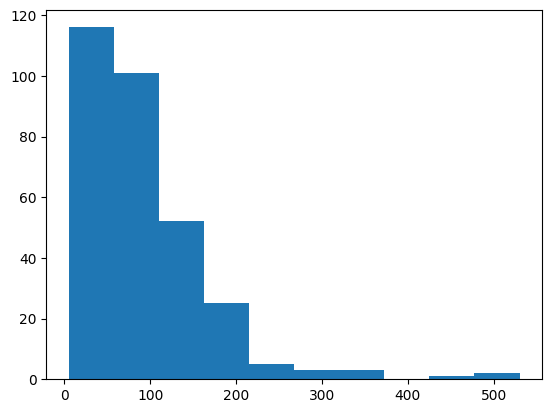

In [8]:
plt.hist(kegglength)